In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩, 변수 초기화

In [3]:
import sys
sys.stdin.encoding

'cp949'

In [4]:
youtube = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

mon = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
       'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
youtube['created_month'] = youtube['created_month'].map(mon) # 두 번 실행하면 nan생김

columns = ['Country', 'Abbreviation', 'country_rank', 'Gross tertiary education enrollment (%)',
           'Population', 'Unemployment rate', 'Urban_population',
           'Latitude', 'Longitude']
country = youtube[columns].drop_duplicates().dropna().reset_index(drop=True)

In [5]:
youtube['Country'].unique()

array(['India', 'United States', nan, 'Japan', 'Russia', 'South Korea',
       'United Kingdom', 'Canada', 'Brazil', 'Argentina', 'Chile', 'Cuba',
       'El Salvador', 'Pakistan', 'Philippines', 'Thailand', 'Colombia',
       'Barbados', 'Mexico', 'United Arab Emirates', 'Spain',
       'Saudi Arabia', 'Indonesia', 'Turkey', 'Venezuela', 'Kuwait',
       'Jordan', 'Netherlands', 'Singapore', 'Australia', 'Italy',
       'Germany', 'France', 'Sweden', 'Afghanistan', 'Ukraine', 'Latvia',
       'Switzerland', 'Vietnam', 'Malaysia', 'China', 'Iraq', 'Egypt',
       'Andorra', 'Ecuador', 'Morocco', 'Peru', 'Bangladesh', 'Finland',
       'Samoa'], dtype=object)

In [6]:
list(country.iterrows())

[(0,
  Country                                           India
  Abbreviation                                         IN
  country_rank                                        1.0
  Gross tertiary education enrollment (%)            28.1
  Population                                 1366417754.0
  Unemployment rate                                  5.36
  Urban_population                            471031528.0
  Latitude                                      20.593684
  Longitude                                      78.96288
  Name: 0, dtype: object),
 (1,
  Country                                    United States
  Abbreviation                                          US
  country_rank                                      7670.0
  Gross tertiary education enrollment (%)             88.2
  Population                                   328239523.0
  Unemployment rate                                   14.7
  Urban_population                             270663028.0
  Latitude                  

# 전처리

오류 데이터, 결측치 보완

In [7]:
# 채울 수 있는 것들 : 'Youtuber', 'subscribers', 'video views', 'uploads', 'Country',
#                    'created_year', 'created_month', 'created_date'
# 자동으로 채워지는 것들: 'Abbreviation', 'Gross tertiary education enrollment (%)', 'Population',
#                             'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'
corrections = {
    ('Country', 'China', ('Youtuber', 'Title'), ('李子柒 Liziqi', '李子柒 Liziqi')),
    ('rank', 940, ('Youtuber'), ('#Refúgio Mental')),
    ('rank', 101, ('Country'), ('Ireland')),
    ('rank', 816, ('Country'), ('Mexico')),
    ('rank', 973, ('Country'), ('India')),
    ('rank', 926, ('Country'), ('United States')),
    ('rank', 919, ('Country'), ('United States')),
    ('rank', 813, ('Country'), ('United States')),
    ('rank', 104, ('Country'), ('United States')),
    ('category', 'Travel & Events', ('Youtuber', 'Title', 'category'), ('Más SKabeche', 'Más SKabeche', 'Entertainment')),
    ('Youtuber', 'Fede Vigevani', ('Country'), ('Mexico')),
    ('Youtuber', 'Troom Troom PT', ('Country'), ('United States')),
    ('Youtuber', 'YouTube Movies', ('channel_type'), ('Film')),
    ('Youtuber', 'Ishtar Music', ('category'), ('Music')),
    ('Youtuber', 'Ultra Bollywood', ('category', 'channel_type'), ('Film & Animation', 'Film')),
    ('Youtuber', 'YouTube', ('created_year', 'created_month', 'created_date'), (2005, 10, 29)),
    ('Youtuber', '1MILLION Dance Studio', ('uploads', 'Country'), (5900, 'South Korea')),
    ('Youtuber', 'Sandeep Maheshwari', ('uploads', 'Country'), (594, 'India')),
    ('Youtuber', 'TKOR', ('uploads', 'Country'), (1500, 'United States')),
    ('Youtuber', 'MoniLina', ('uploads'), (795)),
    ('Youtuber', 'BRIGHT SIDE', ('uploads', 'created_year', 'created_month', 'created_date'),
     (6400, 2017, 3, 15)),
    ('Youtuber', 'Luisito Comunica', ('uploads', 'created_year', 'created_month', 'created_date'),
     (1200, 2012, 4, 15)),
    ('Youtuber', 'T-Series Apna Punjab', ('uploads', 'created_year', 'created_month', 'created_date'),
     (7700, 2011, 9, 26)),
    ('Youtuber', 'Luis Fonsi', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (188, 'United States', 2014, 6, 25)),
    ('Youtuber', 'Alfredo Larin', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'El Salvador', 2017, 4, 9)),
    ('Youtuber', 'Trap City', ('uploads', 'created_year', 'created_month', 'created_date'),
     (2700, 2012, 10, 13)),
    ('Youtuber', 'Musas', ('uploads', 'created_year', 'created_month', 'created_date', 'Population', 'Latitude','Longitude'),
     (630, 2012, 8, 28, 79535, 42.506389, 1.521389)),
    ('Youtuber', 'Chris Brown', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (31, 'United States', 2006, 12, 21)),
    ('Youtuber', 'Good Mythical Morning', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3300, 'United States', 2008, 9, 17)),
    ('Youtuber', 'The Game Theorists', ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (648, 'United States', 2009, 8, 23)),
    ('Youtuber', 'LEGENDA FUNK', ('uploads', 'created_year', 'created_month', 'created_date'),
     (6100, 2013, 5, 11)),
    ('Youtuber', 'Harry Styles', ('uploads', 'created_year', 'created_month', 'created_date'),
     (17, 2017, 3, 9)),
    ('Youtuber', 'Busy Fun Ltd', ('category', 'uploads', 'Country', 'channel_type', 'created_year', 'created_month', 'created_date'),
     ('Comedy', 210, 'India', 'Comedy', 2019, 4, 6)),
    ('Youtuber', "LooLoo Kids - Nursery Rhymes and Children's Songs", ('Title', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ("LooLoo Kids - Nursery Rhymes and Children's Songs", 714, 'United States', 2014, 8, 6)),
    ('rank', 976, ('uploads', 'Youtuber', 'created_year', 'created_month', 'created_date'),
     (996, 'Gustavo Paródias', 2014, 4, 4)),
    ('rank', 932, ('subscribers', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (17600000, 394, 'Argentina', 2014, 10, 21)),
    ('rank', 892, ('Youtuber', 'Title', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ('Knowledge Tv हिन्दी', 'Knowledge Tv हिन्दी', 2900, 'India', 2014, 3, 21)),
    ('rank', 809, ('uploads', 'created_year', 'created_month', 'created_date'),
     (110000, 2017, 12, 11)),
    ('rank', 968, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'United States', 2019, 8, 27)),
    ('rank', 987, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2900, 'United States', 2020, 2, 3)),
    ('rank', 15, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6600, 'India', 2012, 1, 21)),
    ('rank', 52, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (130, 'United States', 2014, 6, 9)),
    ('rank', 49, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (18000, 'Mexico', 2014, 10, 14)),
    ('rank', 63, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (136, 'Chile', 2011, 9, 9)),
    ('rank', 76, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1000, 'United States', 2016, 3, 18)),
    ('rank', 78, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2300, 'Brazil', 2014, 7, 31)),
    ('rank', 864, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (865, 'South Korea', 2017, 5, 12)),
    ('rank', 936, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (5200, 'India', 2014, 3, 13)),
    ('rank', 831, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1300, 'India', 2015, 5, 11)),
    ('rank', 878, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6200, 'Brazil', 2013, 11, 30)),
    ('rank', 779, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8000, 'United States', 2014, 3, 22)),
    ('rank', 778, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (38, 'Germany', 2009, 5, 12)),
    ('rank', 105, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (141, 'United States', 2020, 4, 8)),
    ('rank', 110, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1200, 'India', 2018, 10, 10)),
    ('rank', 114, ('Country', 'created_month'), ('India', 9)),
    ('rank', 115, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (953, 'India', 2017, 8, 14)),
    ('rank', 123, ('Country', 'created_year', 'created_month', 'created_date'),
      ('India',2014, 10, 6)),
    ('rank', 136, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4700, 'India', 2015, 6, 27)),
    ('rank', 141, ('Country', 'created_date'),
     ("South Korea",19)),
    ('rank', 167, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2800, 'Indonesia', 2014, 1, 22)),
    ('rank', 170, ('Country'), ('Ireland')),
    ('rank', 179, ('uploads', 'Country', 'created_month', 'created_date'),
     (483, "India", 7, 7)),
    ('rank', 181, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (21000, 'India', 2008, 5, 1)),
    ('rank', 184, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1100, 'Mexico', 2016, 2, 12)),
    ('rank', 189, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (58, 'Canada', 2009, 6, 6)),
    ('rank', 190, ('Country'), ('India')),
    ('rank', 201, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2400, 'United States',2014, 5, 13)),
    ('rank', 221, ('Youtuber', 'uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     ('Marília Mendonça', 140, 'Brazil', 2013, 5, 13)),
    ('rank', 229, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (316, 'United States', 2013, 8, 7)),
    ('rank', 234, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (225, 'Spain',2015, 10, 18)),
    ('rank', 236, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (180000, 'India',2017, 3, 3)),
    ('rank', 253, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (101, 'India', 2012, 10, 24)),
    ('rank', 265, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4900, 'India', 2013, 11, 22)),
    ('rank', 270, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'India', 2010, 3, 16)),
    ('rank', 277, ('Country'),
     ('United States')),
    ('rank', 330, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8400, 'Saudi Arabia', 2012, 1, 10)),
    ('rank', 331, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3700, 'India', 2016, 5, 13)),
    ('rank', 339, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (3900,'United States', 2021, 3, 17)),
    ('rank', 349, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (362, 'India', 2019, 4, 25)),
    ('rank', 367, ('uploads', 'Country', 'created_month', 'created_date'),
     (469, 'United States', 10, 15)),
    ('rank', 387, ('Country', 'created_year', 'created_month', 'created_date'),
     ('United States', 2016, 1, 26)),
    ('rank', 395, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4000, 'Brazil', 2014, 5, 18)),
    ('rank', 441, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1100, 'Brazil', 2016, 2, 16)),
    ('rank', 445, ('category', 'uploads', 'Country', 'channel_type', 'created_year', 'created_month', 'created_date'),
     ('Music', 62, 'United States', 'Music', 2016, 12, 1)),
    ('rank', 451, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4100, 'United Kingdom', 2006, 9, 14)),
    ('rank', 464, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (950, 'United States', 2018, 5, 10)),
    ('rank', 477, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (962, 'India', 2012, 5, 1)),
    ('rank', 493, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (220, 'Indonesia', 2017, 8, 25)),
    ('rank', 174, ('created_year', 'created_month', 'created_date'),
     (2013, 12, 4)),
    ('rank', 203, ('Country'), ('India')),
    ('rank', 219, ('Country'), ('Sweden')),
    ('rank', 246, ('Country'), ('India')),
    ('rank', 259, ('Country'), ('United States')),
    ('rank', 289, ('Country'), ('India')),
    ('rank', 303, ('Country'), ('India')),
    ('rank', 305, ('Country'), ('Russia')),
    ('rank', 361, ('created_year', 'created_month', 'created_date'),
     (2013, 12, 21)),
    ('rank', 383, ('Youtuber', 'Title', 'Country'),
     ("हिंदी - Genevieve's Playhouse", "हिंदी - Genevieve's Playhouse", 'United States')),
    ('rank', 411, ('Country'), ('United States')),
    ('rank', 426, ('Country'), ('United States')),
    ('rank', 427, ('Country'), ('Canada')),
    ('rank', 432, ('Country'), ('India')),
    ('rank', 433, ('Country'), ('United States')),
    ('rank', 458, ('Country'), ('United States')),
    ('rank', 470, ('Country'), ('India')),
    ('rank', 484, ('Country'), ('South Korea')),
    ('rank', 501, ('Country'), ('United States')),
    ('rank', 524, ('Country'), ('United States')),
    ('rank', 535, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (362, 'United Kingdom', 2012, 10, 7)),
    ('rank', 544, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (552, 'Mexico', 2012, 9, 4)),
    ('rank', 545, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (4700, 'Spain', 2012, 12, 12)),
    ('rank', 546, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (594, 'India', 2021, 5, 26)),
    ('rank', 549, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (781, 'Pakistan', 2013, 10, 30)),
    ('rank', 570, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (74000, 'Indonesia', 2015, 7, 28)),
    ('rank', 591, ('uploads', 'created_year', 'created_month', 'created_date'),
     (506, 2012, 6, 4)),
    ('rank', 596, ('Country'), ('South Korea')),
    ('rank', 17, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (6500, 'United States', 2016, 11, 15)),
    ('rank', 51, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (791, 'Belarus', 2014, 11, 29)),
    ('rank', 62, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (447, 'Norway', 2012, 8, 26)),
    ('rank', 123, ('uploads'), (130)),
    ('rank', 165, ('uploads', 'created_year', 'created_month', 'created_date'),
     (545, 2010, 7, 4)),
    ('rank', 227, ('uploads', 'created_year', 'created_month', 'created_date'),
     (1100, 2009, 6, 17)),
    ('rank', 274, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2100, 'United States', 2012,7,12)),
    ('rank', 300, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (169, 'United States', 2006,7,25)),
    ('rank', 341, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (273, 'Mexico', 2015,6,29)),
    ('rank', 362, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (55, 'United States', 2005,10,7)),
    ('rank', 378, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (746, 'United States', 2006,11,29)),
    ('rank', 399, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8600, 'United States', 2005,6,16)),
    ('rank', 412, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (737, 'United States', 2013,9,9)),
    ('rank', 404, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (241, 'Canada', 2011,9,11)),
    ('rank', 555, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (973, 'Mexico', 2007,2,28)),
    ('rank', 601, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (8300, 'Mexico', 2015,7,18)),
    ('rank', 605, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1900, 'Turkey', 2012,11,19)),
    ('rank', 630, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (487,'United States', 2016,7,11)),
    ('rank', 635, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (1300, 'United States', 2017,1,31)),
    ('rank', 669, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (614, 'South Korea', 2018,9,9)),
    ('rank', 681, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (2100, 'United States',2014,1,21)),
    ('rank', 711, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (445, 'United States', 2009,5,1)),
    ('rank', 756, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (613, 'Brazil', 2016,2,24)),
    ('rank', 770, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (952, 'United States', 2011,11,20)),
    ('rank', 801, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (130000, 'India', 2008,3,14)),
    ('rank', 854, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (767, 'India', 2016,11,26)),
    ('rank', 905, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (547,'India', 2020,3,11)),
    ('rank', 662, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (296, 'Mexico', 2016,11,16)),
    ('rank', 688, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (0, 'United States', 2019,8,14)),
    ('rank', 751, ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
     (39,'United States', 2016,2,13)),
#     ('rank', , ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
#      ()),
#     ('rank', , ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
#      ()),
#     ('rank', , ('uploads', 'Country', 'created_year', 'created_month', 'created_date'),
#      ()),
    
    }
for item in corrections:
    youtube.loc[youtube[item[0]]==item[1], item[2]] = item[3]

# 나라와 관련된 정보 null 값 채우기
for _, row in country.iterrows():
    for col in columns[1:]:
        youtube.loc[youtube['Country']==row['Country'], col] = row[col]

# 국가정보 업데이트 (벨라루스, 노르웨이)
columns = ['Abbreviation', 'country_rank', 'Gross tertiary education enrollment (%)',
           'Population', 'Unemployment rate', 'Urban_population',
           'Latitude', 'Longitude']
youtube.loc[youtube['Country']=='Belarus', columns] = [
    'BY', None, None, 9349645, None, None, 53.90, 27.58]
youtube.loc[youtube['Country']=='Norway', columns] = [
    'NO', None, None, 5488984, None, None, 59.92, 10.75]

# category, channel_type 값 변경 및 null 값 채우기
category_dict = {'Movies': 'Film & Animation'}
channel_type_dict = {'Games': 'Gaming',
                'Howto': 'Howto & Style',
                'Tech': 'Science & Technology',
                'Film': 'Film & Animation',
                'People': 'People & Blogs',
                'News': 'News & Politics',
                'Autos': 'Autos & Vehicles',
                'Animals': 'Pets & Animals',
                'Nonprofit': 'Nonprofits & Activism',
               }
for key in category_dict:
    youtube.loc[youtube['category']==key, 'category'] = category_dict[key]
for key in channel_type_dict:
    youtube.loc[youtube['channel_type']==key, 'channel_type'] = channel_type_dict[key]

temp = youtube['category'].isnull()
youtube.loc[temp, 'category'] = youtube.loc[temp, 'channel_type']
temp = youtube['channel_type'].isnull()
youtube.loc[temp, 'channel_type'] = youtube.loc[temp, 'category']

In [8]:
# 수정이 잘 되었는지 row별로 확인
# youtube[youtube['rank'] == 784].T

In [9]:
youtube[youtube['uploads'] < 10].drop(index=[1, 5, 12, 18, 102, 173, 286, 360, 386, 592, 606, 687, 700, 951, ])

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [10]:
youtube[youtube['Country'].isnull()].drop(index=[
    5, 12, 57, 74, 102, 173, 331, 360, 518, 590, 592, 601, 624, 699, 765, 783, 784, 805, 889, 939, 951])


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


날짜

In [11]:
from datetime import date
def to_date(x):
    return np.nan if x.isnull().sum() else date(int(x[0]), int(x[1]), int(x[2]))
youtube['created'] = youtube[['created_year', 'created_month', 'created_date']].apply(to_date, axis=1)

## 수익 분석: 채널 성과와 예상 수익 간의 상관 관계를 살펴봅니다.

In [12]:
# rank : 순위 : 구독자 수 기준 유튜브 채널 위치
# Youtuber : 유튜버 : 유튜브 채널명
# subscribers : 구독자: 채널에 대한 구독자 수
# video views : 비디오 조회수: 채널의 모든 비디오에 대한 총 조회수
# category : 카테고리: 채널의 카테고리 또는 틈새
# Title : 제목 : 유튜브 채널의 제목
# uploads : 업로드: 채널에 업로드된 총 동영상 수
# Country : 국가: 유튜브 채널이 개설된 국가
# Abbreviation : 약칭: 국b가의 약칭
# channel_type : 유튜브 채널의 유형(예: 개인, 브랜드)
# video_views_rank : 총 동영상 조회수 기준 채널 순위
# country_rank : 자국 내 가입자 수 기준 채널 순위
# channel_type_rank : 채널의 종류(개별 또는 브랜드)에 따른 순위
# video_views_for_last_30_days: 최근 30일 동안의 총 비디오 조회수
# lowest_monthly_earnings : 가장 낮은_월간 수익: 채널의 가장 낮은 월 예상 수익
# highest_monthly_earnings : 가장 높은_월간 수익: 채널의 가장 높은 월 예상 수익
# lowest_yearly_earnings : 가장 낮은_연간 수익: 채널의 가장 낮은 추정 연간 수익
# highest_yearly_earnings : 최고 _연간 _ 수익 : 채널의 최고 예상 연간 수익
# subscribers_for_last_30_days: 최근 30일 동안 얻은 새 가입자 수
# created_year: 유튜브 채널이 생성된 연도
# created_Month : 유튜브 채널이 생성된 달
# created_date : 유튜브 채널 생성 정확한 날짜
# Gross tertiary education enrollment (%) : 고등 교육 총 등록자(%): 국가에서 고등 교육에 등록한 인구의 비율
# Population : 인구: 해당 국가의 총 인구
# Unemployment rate : 실업률: 해당 국가의 실업률
# Urban_population : 도시_인구: 도시지역에 거주하는 인구의 비율
# Latitude : 위도: 국가 위치의 위도 좌표
# Longtitude : 경도: 국가 위치의 경도 좌표

- data 정보 확인

In [13]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 993 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  974 non-null    object 
 8   Abbreviation                             972 non-null    object 
 9   channel_type                             993 non-null    object 
 10  video_views_rank                         994 non-n

- 30일간의 비디오 시청수와 구독자 수 증가를 성과로 보고 예상 수익과의 상관관계를 분석

In [14]:
youtube_30days_earnings = youtube.loc[:,['Title', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']]

- 결측치 제거

In [15]:
youtube_30days_earnings_nonna = youtube_30days_earnings.drop(columns=['Title']).fillna(0)

- 상관관계 확인

<AxesSubplot:>

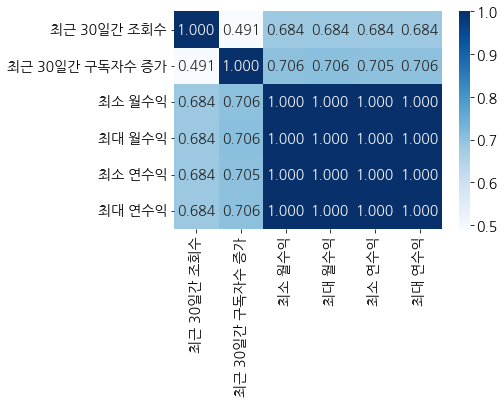

In [16]:
temp = youtube_30days_earnings_nonna.copy()
temp.columns = [
    '최근 30일간 조회수', '최근 30일간 구독자수 증가',
    '최소 월수익', '최대 월수익', '최소 연수익', '최대 연수익']
sns.heatmap(temp.corr(), annot=True, fmt='.3f', cmap="Blues")

- 30일간의 구독자수 증가와 비디오 시청수는 단위가 다르기 때문에 각자 [0, 1, 2, 3], [0, 1, 2] 로 
범주화 한다. 비디오 시청수가 유튜브 광고 정책상 수익과 더 연관 되어 있기 때문에 가중치를 좀더 준다.

In [17]:
youtube_days_earnings = youtube_30days_earnings_nonna

0, 1, 2, 3 순으로 시청수 범주화

In [18]:
youtube_days_earnings['video_views_for_the_last_30_days_category'] = pd.cut(youtube_days_earnings['video_views_for_the_last_30_days'], bins=[0,1.351700e+07,5.635800e+07,1.585655e+08,6.589000e+09], labels=[0,1,2,3])
youtube_days_earnings['video_views_for_the_last_30_days_category'] = pd.to_numeric(youtube_days_earnings['video_views_for_the_last_30_days_category'])

In [19]:
youtube_days_earnings['subscribers_for_last_30_days'].describe()

count    9.950000e+02
mean     2.308483e+05
std      5.261092e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+05
75%      2.000000e+05
max      8.000000e+06
Name: subscribers_for_last_30_days, dtype: float64

0, 1, 2 순으로 구독자 증가수 범주화

In [20]:
youtube_days_earnings['subscribers_for_last_30_days_category'] = pd.cut(youtube_days_earnings['subscribers_for_last_30_days'], bins=[0,1.000000e+05,2.000000e+05 ,8.000000e+06], labels=[0,1,2])
youtube_days_earnings['subscribers_for_last_30_days_category'] = pd.to_numeric(youtube_days_earnings['subscribers_for_last_30_days_category'])

In [21]:
(youtube_days_earnings['video_views_for_the_last_30_days_category']+youtube_days_earnings['subscribers_for_last_30_days_category']).describe()

count    642.000000
mean       2.870717
std        1.719063
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        5.000000
dtype: float64

- 각 범주를 더한 값을 새로운 칼럼으로 입력

In [22]:
youtube_days_earnings['view_subscribers_total_category'] = youtube_days_earnings['video_views_for_the_last_30_days_category']+youtube_days_earnings['subscribers_for_last_30_days_category']

- [0, 1, 2, 3, 4, 5]의 범주마다 채널수 확인

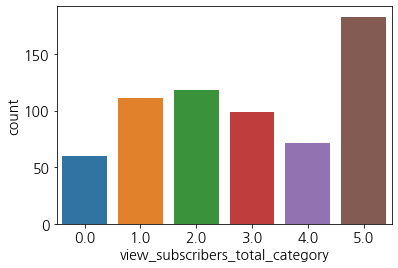

In [23]:
sns.countplot(x = youtube_days_earnings['view_subscribers_total_category'])
plt.savefig('30days_earnings1.png')

- 30일간의 비디오 시청수와 수익간의 산점도

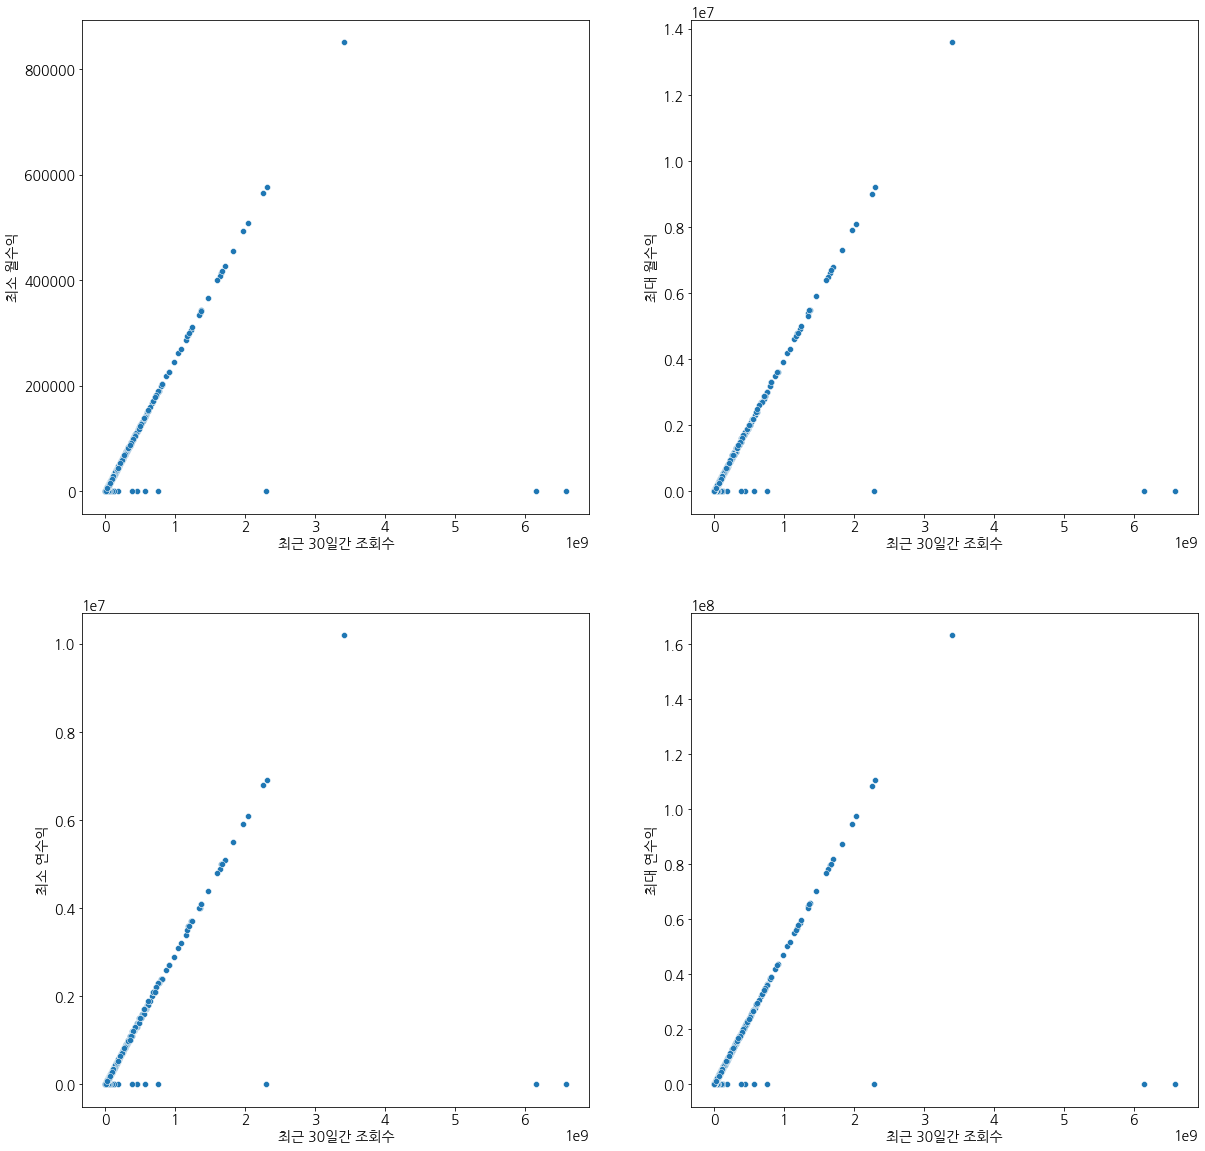

In [24]:
# temp = temp + 1
fig, axes = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))
ax = axes[0,0]
sns.scatterplot(data= temp, x='최근 30일간 조회수', y='최소 월수익', ax=ax)
# ax.loglog()

ax = axes[0,1]
sns.scatterplot(data= temp, x='최근 30일간 조회수', y='최대 월수익', ax=ax)
# ax.loglog()

ax = axes[1,0]
sns.scatterplot(data= temp, x='최근 30일간 조회수', y='최소 연수익', ax=ax)
# ax.loglog()

ax = axes[1,1]
sns.scatterplot(data= temp, x='최근 30일간 조회수', y='최대 연수익', ax=ax)
# ax.loglog()
plt.show()

- 30일간의 비디오 시청수와 수익 범주간의 그래프

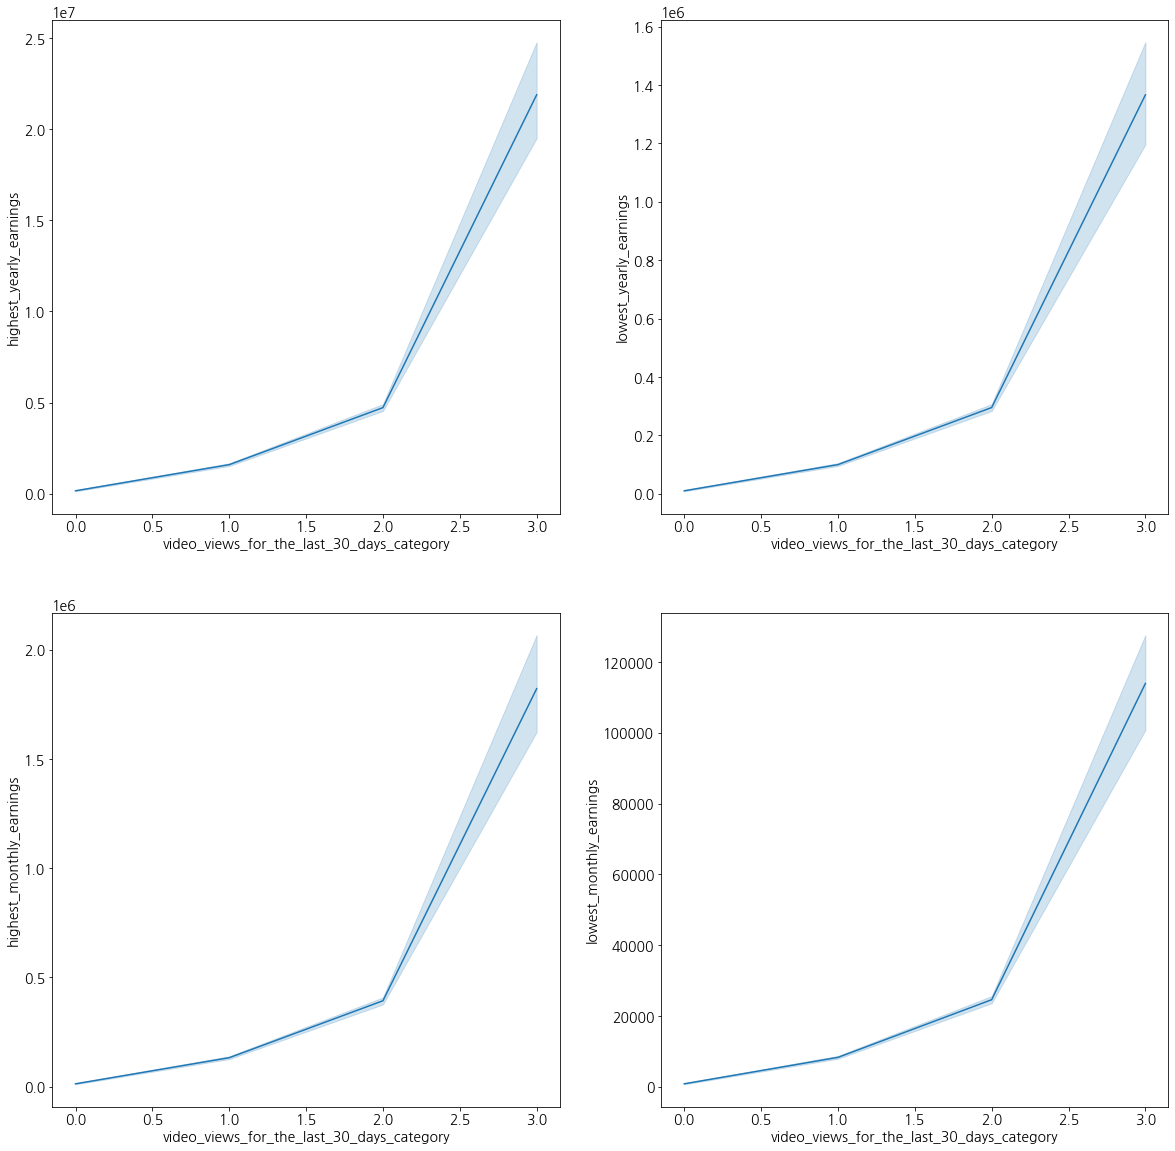

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))
sns.lineplot(x='video_views_for_the_last_30_days_category', y='highest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,0])
sns.lineplot(x='video_views_for_the_last_30_days_category', y='lowest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,1])
sns.lineplot(x='video_views_for_the_last_30_days_category', y='highest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,0])
sns.lineplot(x='video_views_for_the_last_30_days_category', y='lowest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,1])
plt.savefig('30days_earnings3.png')

- 30일간의 구독자 증가수와 수익간의 산점도

In [26]:
youtube_days_earnings[['subscribers_for_last_30_days', 'video_views_for_the_last_30_days_category']].corr()

,subscribers_for_last_30_days,video_views_for_the_last_30_days_category
subscribers_for_last_30_days,1.000000,0.435485
video_views_for_the_last_30_days_category,0.435485,1.000000


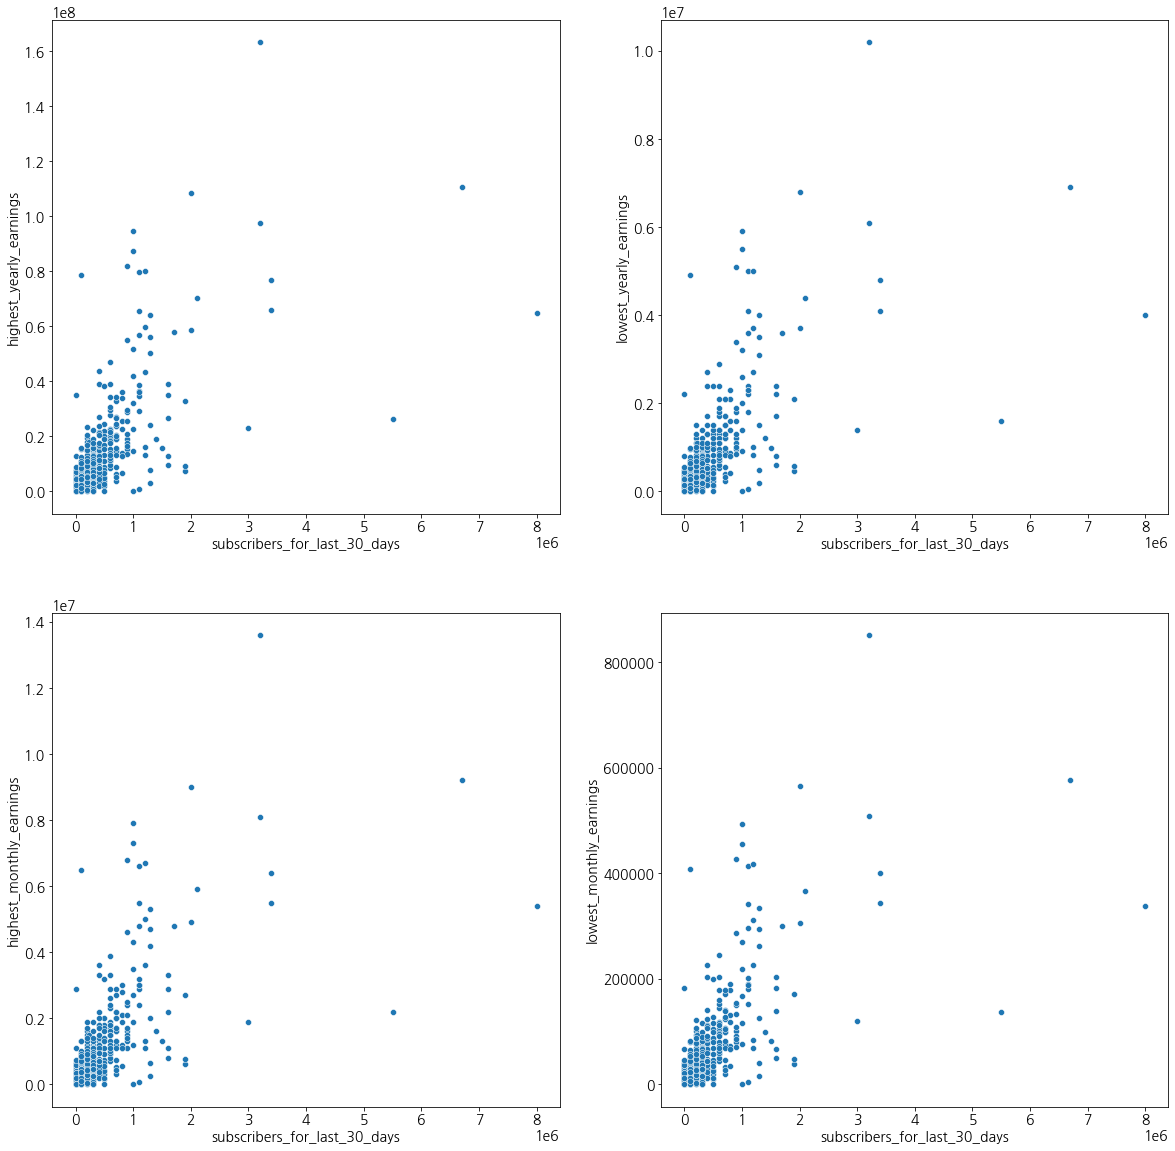

In [27]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))
sns.scatterplot(data= youtube_days_earnings, x='subscribers_for_last_30_days', y='highest_yearly_earnings', ax=ax[0,0])
sns.scatterplot(data= youtube_days_earnings, x='subscribers_for_last_30_days', y='lowest_yearly_earnings', ax=ax[0,1])
sns.scatterplot(data= youtube_days_earnings, x='subscribers_for_last_30_days', y='highest_monthly_earnings', ax=ax[1,0])
sns.scatterplot(data= youtube_days_earnings, x='subscribers_for_last_30_days', y='lowest_monthly_earnings', ax=ax[1,1])
plt.savefig('30days_earnings4.png')

- 30일간의 구독자 증가수 범주와 수익간의 그래프

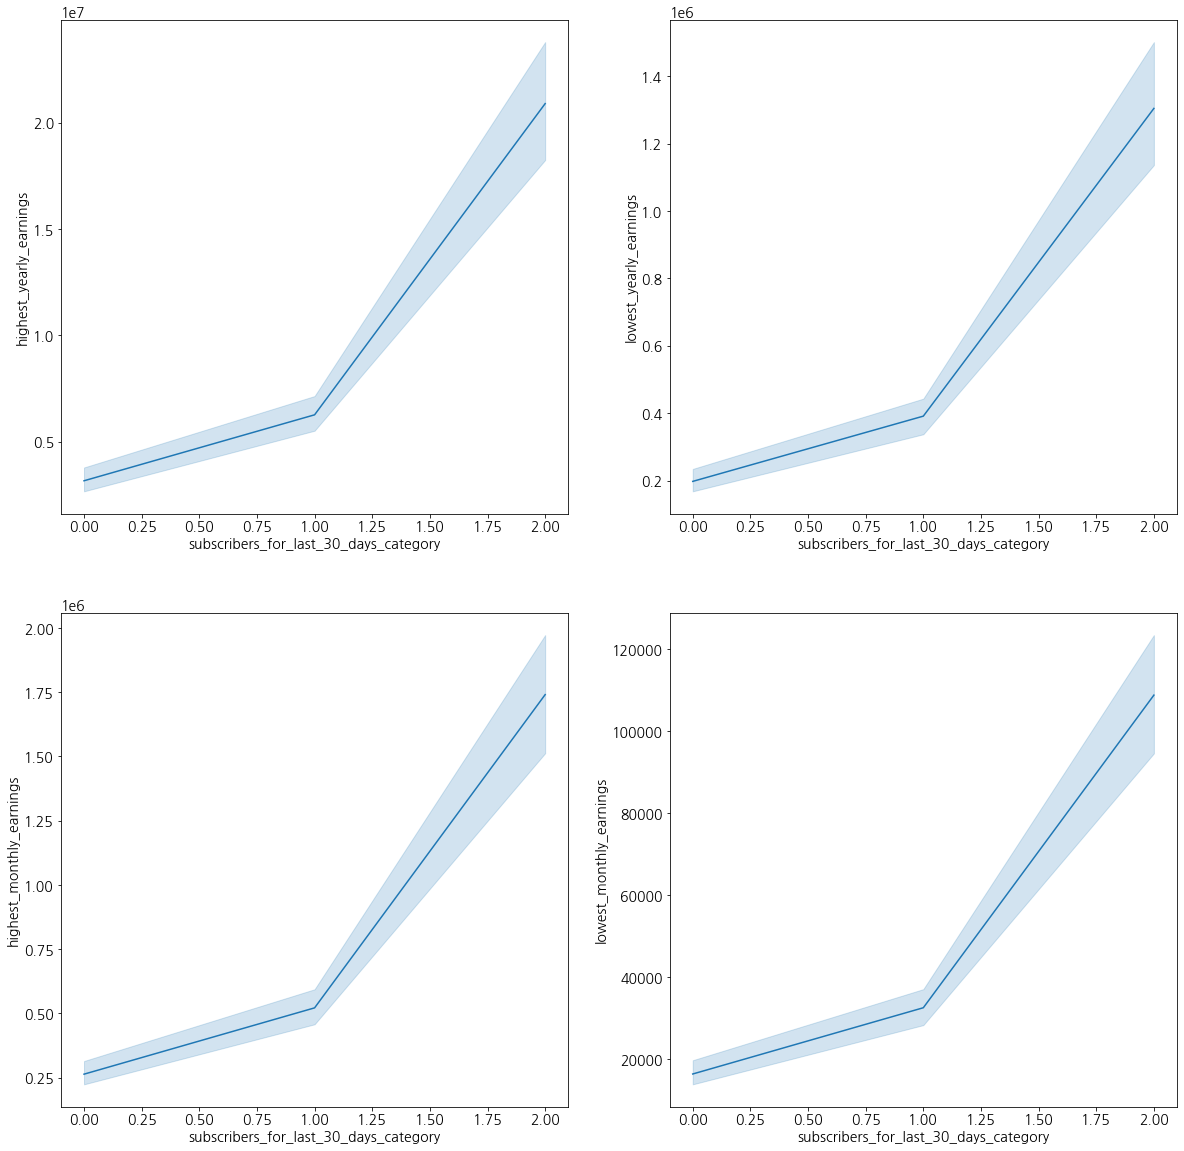

In [28]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))
sns.lineplot(x='subscribers_for_last_30_days_category', y='highest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,0])
sns.lineplot(x='subscribers_for_last_30_days_category', y='lowest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,1])
sns.lineplot(x='subscribers_for_last_30_days_category', y='highest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,0])
sns.lineplot(x='subscribers_for_last_30_days_category', y='lowest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,1])
plt.savefig('30days_earnings5.png')

- 30일간의 비디오 시청수와 구독자 증가수의 범주값 합과 수익간의 그래프

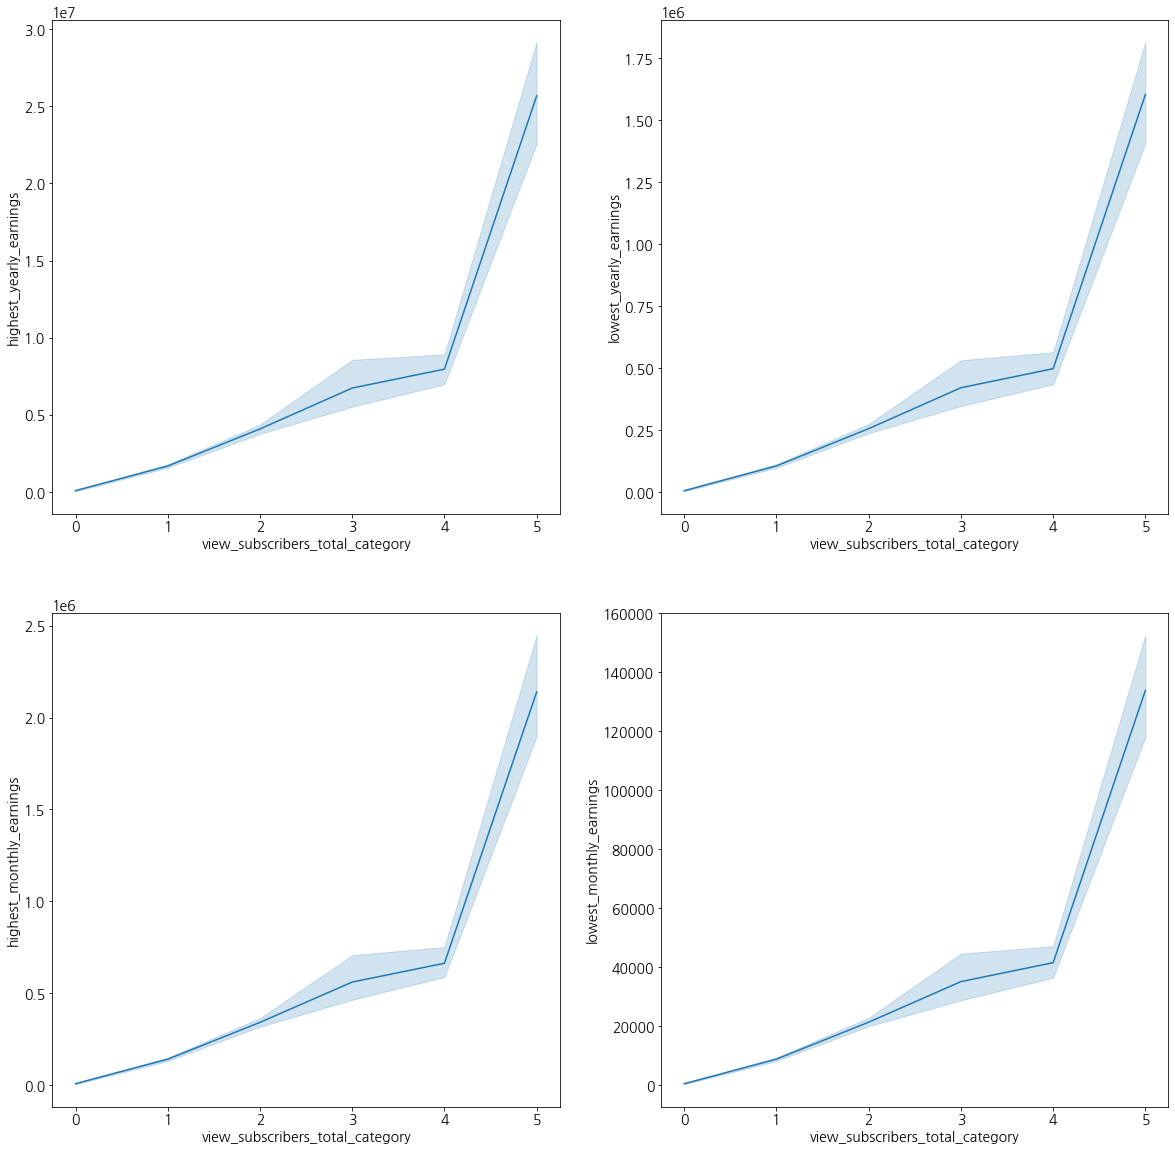

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=2,  figsize=(20,20))
sns.lineplot(x='view_subscribers_total_category', y='highest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,0])
sns.lineplot(x='view_subscribers_total_category', y='lowest_yearly_earnings', data=youtube_days_earnings, ax=ax[0,1])
sns.lineplot(x='view_subscribers_total_category', y='highest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,0])
sns.lineplot(x='view_subscribers_total_category', y='lowest_monthly_earnings', data=youtube_days_earnings, ax=ax[1,1])
plt.savefig('30days_earnings6.png')

## 결론
- 최근 30일간의 성과와 예상수익은 정비례하는 것으로 보인다.